# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("E:/UCLA/Winter 2024/ECON 441B/fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = pd.DataFrame(df["is_fraud"])

C:\Users\prano\AppData\Local\Temp\ipykernel_19888\1065942435.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
C:\Users\prano\AppData\Local\Temp\ipykernel_19888\1065942435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [7]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [9]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [10]:
X_train = pd.DataFrame(X_train)
X_train.columns = X.columns

In [11]:
y_train = pd.DataFrame(y_train)
y_train.columns = y.columns

In [12]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

# 3.) Train three logistic regression models

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prano\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prano\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 4.) Test the three models

In [15]:
over_log.score(X_test, y_test)

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.905084095107848

In [16]:
under_log.score(X_test, y_test)

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9097267208906163

In [17]:
smote_log.score(X_test, y_test)

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.9018330574150052

In [18]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [19]:
# Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_true = y_test

In [22]:
y_pred_over = over_log.predict(X_test)
cm1 = confusion_matrix(y_true, y_pred_over)
cm1

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[75216,  7828],
       [   84,   230]], dtype=int64)

In [23]:
print("Over Sample Sensitivity : ", cm1[1,1] /( cm1[1,0] + cm1[1,1]))

Over Sample Sensitivity :  0.732484076433121


In [24]:
y_pred_under = under_log.predict(X_test)
cm2 = confusion_matrix(y_true, y_pred_under)
cm2

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[75601,  7443],
       [   82,   232]], dtype=int64)

In [25]:
print("Under Sample Sensitivity : ", cm2[1,1] /( cm2[1,0] + cm2[1,1]))

Under Sample Sensitivity :  0.7388535031847133


In [26]:
y_pred_smote = smote_log.predict(X_test)
cm3 = confusion_matrix(y_true, y_pred_smote)
cm3

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[74944,  8100],
       [   83,   231]], dtype=int64)

In [27]:
print("SMOTE Sample Sensitivity : ", cm3[1,1] /( cm3[1,0] + cm3[1,1]))

SMOTE Sample Sensitivity :  0.7356687898089171


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [28]:
raw_temp = pd.concat([X_train, y_train], axis =1)

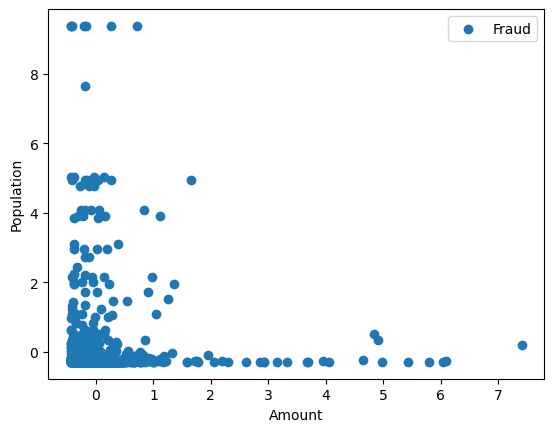

In [29]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [30]:

raw_temp2 = pd.concat([smote_X, smote_y], axis =1)


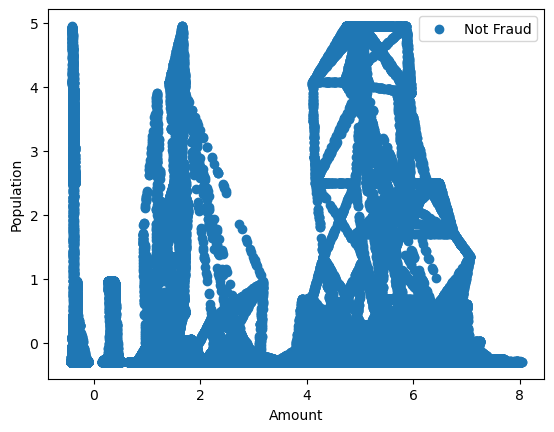

In [31]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp2[raw_temp2["is_fraud"] == 1]["amt"], raw_temp2[raw_temp2["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [33]:
resampling_methods = {
    "Oversampling" : RandomOverSampler(),
    "Undersampling" : RandomUnderSampler(),
    "SMOTE" : SMOTE()
}

model_methods = {
    "Logistic" : LogisticRegression(),
    "Lasso" : LogisticRegression(penalty = "l1", C = 2., solver = "liblinear"),
    "Decision Tree" : DecisionTreeClassifier()
}

In [34]:
def calc_perf_metric(y_true, y_pred): 
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp/(tp+fn)
    specificity = tn/(tn+fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return sensitivity, specificity, precision, recall, f1


In [35]:
trained_model = {}
results = []

In [42]:
for resample_key, resampler in resampling_methods.items(): 
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)

    for model_key, model in model_methods.items(): 
        combined_key = f"{resample_key}_{model_key}"
        mod = model.fit(resample_X, resample_y)
        trained_model[combined_key] = mod
        y_pred = trained_model[combined_key].predict(X_test)
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_true, y_pred)
        results.append({"Model Name" : combined_key,
                        "Sensitivity" : sensitivity, 
                        "Specificity" : specificity, 
                        "Precision" : precision,
                        "Recall" : recall, 
                        "F-1 Score" : f1})

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\prano\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid f

In [43]:
results_df = pd.DataFrame(results)
results_df

,Model Name,Sensitivity,Specificity,Precision,Recall,F-1 Score
0,Oversampling_Logistic,0.732484,0.906519,0.028775,0.732484,0.055375
1,Oversampling_Lasso,0.732484,0.906556,0.028786,0.732484,0.055395
2,Oversampling_Decision Tree,0.525478,0.998724,0.608856,0.525478,0.564103
3,Undersampling_Logistic,0.729299,0.894237,0.025411,0.729299,0.049110
4,Undersampling_Lasso,0.729299,0.893791,0.025307,0.729299,0.048916
5,Undersampling_Decision Tree,0.955414,0.941862,0.058502,0.955414,0.110254
6,SMOTE_Logistic,0.735669,0.904075,0.028181,0.735669,0.054283
7,SMOTE_Lasso,0.735669,0.904099,0.028188,0.735669,0.054295
8,SMOTE_Decision Tree,0.716561,0.993401,0.291074,0.716561,0.413983


## Based on the results compiled above, the metrics seem to vary significantly and each metric appears to favour certain characteristics of the data. 

### At first glance,the decision tree seems to perform the best in terms of its F1-score across the board with scores all above the 10% mark, a mark not reached by most of the other models. All three sampling methods return F-1 scores in the single-digit range, which renders those models wholly inadequate. Additionally, all of our models appear to have really poor precision scores. 

When comparing the resampling methods specifically, it is undersampling which appears to perform the best in terms of sensitivity. However, this performance does not carry over to F-1 score, where the method with the best results appears to be oversampling. As F-1 is a synthetic benchmark that takes both precision and recall into consideration, it would have the higher credibility. As expected theoretically, SMOTE is a middle ground between the performance of the other two methods. 

As for the model methods, Logistic appears to offer the most consistent results irrespective of its application with different resampling algorithms. Sensitivity and F-1 score are all tightly range-bound, meaning that it is least sensitive to specific data characteristics. This perhaps will yield a better result in the out-of-sample performance which is tested below. There is hardly any degree of seperation between Logistic Regression and Lasso, which is perhaps down to the differences in the underlying model itself. Decision tree while having the highest scores in a lot of categories also displays variance between metrics and sampling methods. 

In [40]:
resample_X_holdout, resample_y_holdout = smote.fit_resample(X_train, y_train)
log_reg = LogisticRegression()
model_holdout = log_reg.fit(resample_X_holdout, resample_y_holdout)
y_pred_holdout = model_holdout.predict(X_holdout)
tn, fp, fn, tp = confusion_matrix(y_holdout, y_pred_holdout).ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = precision_score(y_holdout, y_pred_holdout)
recall = recall_score(y_holdout, y_pred_holdout)
f1 = f1_score(y_holdout, y_pred_holdout)
print({"Model Name" : "SMOTE_Logistic",
                        "Sensitivity" : sensitivity, 
                        "Specificity" : specificity, 
                        "Precision" : precision,
                        "Recall" : recall, 
                        "F-1 Score" : f1})

C:\Users\prano\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'Model Name': 'SMOTE_Logistic', 'Sensitivity': 0.7456647398843931, 'Specificity': 0.9026164891822869, 'Precision': 0.030927835051546393, 'Recall': 0.7456647398843931, 'F-1 Score': 0.05939226519337017}


C:\Users\prano\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## The out-of-sample performance on the holdout data is as predicted, with metrics all performing well relative to their levels on in-sample data. 

### This solidifies the conclusion made, that logistic regression is the most consistent model delivering results in out-of-sample data. 
With a sensitivity of nearly 75%, the logistic regression out performs all 